In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('students.csv')
X = data.drop(['Roll No','Final Exam Score'],axis=1)
y = data['Final Exam Score']
X_encoded = pd.get_dummies(X, columns=['Extracurricular', 'School Type', 'Parental Education', 'Gender'], drop_first=True)

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_encoded,y)
feature_order = X_encoded.columns.tolist()

In [22]:
new_student_data = pd.DataFrame({
    'Study Hours/Week': [10],
    'Previous Scores': [85],
    'Family Income ($)': [45000],
    'Distance to School (miles)': [2.5],
    'Number of Friends': [3],
    'Commute Time (minutes)': [20],
    'Extracurricular_Yes': [1],
    'School Type_Public': [1],
    'Parental Education_Master\'s': [0],
    'Gender_Male': [1]
}, columns=feature_order)  # Ensure the order matches
predicted_score = regressor.predict(new_student_data)
print("Predicted Final Exam Score:", predicted_score)

Predicted Final Exam Score: [91.]


In [24]:
#Understanding the decision tree

feature_importance = regressor.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [5.34326961e-03 8.48522490e-01 1.15416200e-02 1.21094409e-01
 1.36790404e-03 1.41012330e-03 7.70572952e-03 0.00000000e+00
 4.72855718e-04 5.91069647e-05 1.53678108e-03 9.45711435e-04]


In [26]:
tree_depth = regressor.get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 7


In [27]:
max_tree_depth = regressor.max_depth
min_samples_split = regressor.min_samples_split
min_samples_leaf = regressor.min_samples_leaf

print("Max Tree Depth (Stopping Criteria):", max_tree_depth)
print("Min Samples Split (Stopping Criteria):", min_samples_split)
print("Min Samples Leaf (Stopping Criteria):", min_samples_leaf)

Max Tree Depth (Stopping Criteria): None
Min Samples Split (Stopping Criteria): 2
Min Samples Leaf (Stopping Criteria): 1


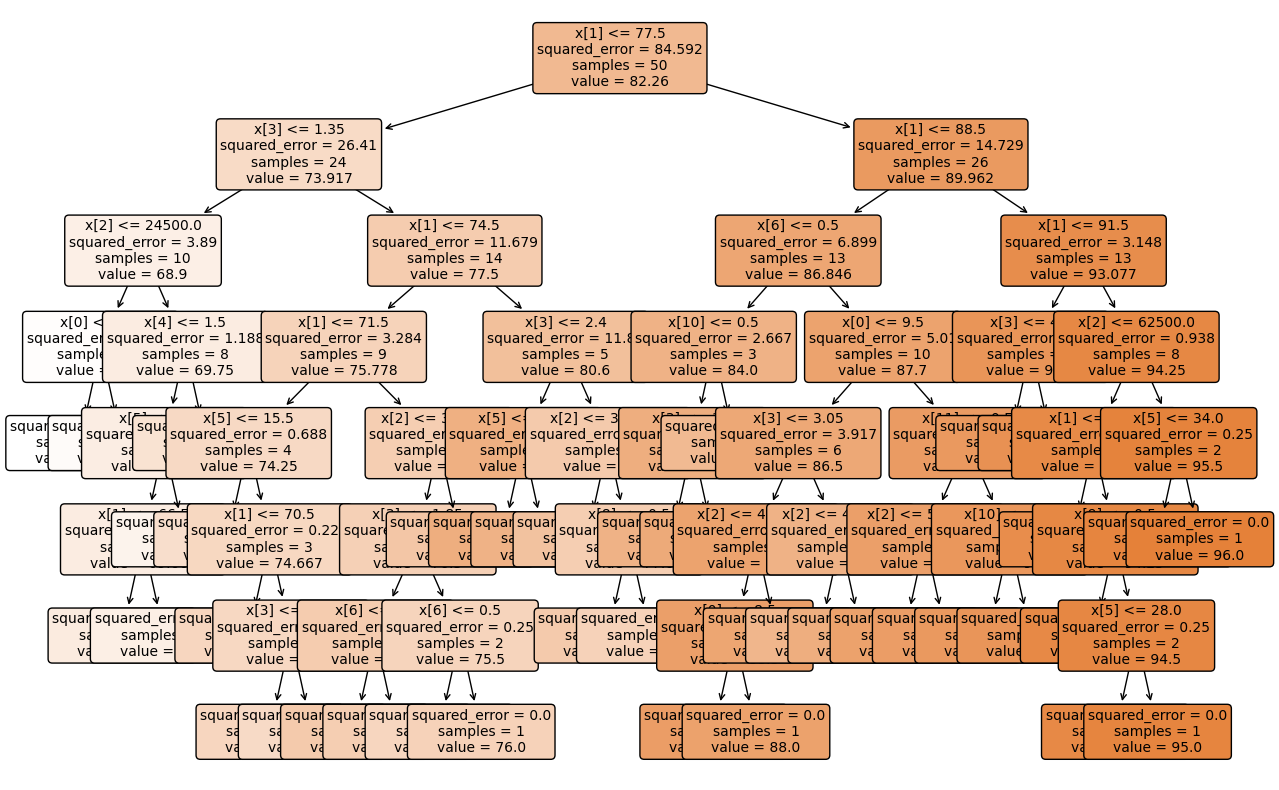

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, rounded=True, fontsize=10)
plt.show()